In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fetching data and loading into a dataframe
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
df = pd.read_csv(filename, names=headers)
df.replace("?", np.nan, inplace=True)
print(df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [4]:
# Handling missing values

missing_data = df.isnull()
print(missing_data.head())

   symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0      False               True  False      False       False         False   
1      False               True  False      False       False         False   
2      False               True  False      False       False         False   
3      False              False  False      False       False         False   
4      False              False  False      False       False         False   

   body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0       False         False            False       False  ...        False   
1       False         False            False       False  ...        False   
2       False         False            False       False  ...        False   
3       False         False            False       False  ...        False   
4       False         False            False       False  ...        False   

   fuel-system   bore  stroke  compression-ratio  horsep

In [5]:
# Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

symboling
False    205
Name: symboling, dtype: int64
 
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
 
make
False    205
Name: make, dtype: int64
 
fuel-type
False    205
Name: fuel-type, dtype: int64
 
aspiration
False    205
Name: aspiration, dtype: int64
 
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
 
body-style
False    205
Name: body-style, dtype: int64
 
drive-wheels
False    205
Name: drive-wheels, dtype: int64
 
engine-location
False    205
Name: engine-location, dtype: int64
 
wheel-base
False    205
Name: wheel-base, dtype: int64
 
length
False    205
Name: length, dtype: int64
 
width
False    205
Name: width, dtype: int64
 
height
False    205
Name: height, dtype: int64
 
curb-weight
False    205
Name: curb-weight, dtype: int64
 
engine-type
False    205
Name: engine-type, dtype: int64
 
num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64
 
engine-size
False    205
Name: engine-size, dtype: int64

In [6]:
# Finding mean or average of each column and replacing the null values with it

avg_norm_loss = df["normalized-losses"].astype('float').mean(axis = 0)
print("Average of normalizes losses: ", avg_norm_loss)
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore = df['bore'].astype('float').mean(axis = 0)
df['bore'].replace(np.nan, avg_bore, inplace=True)

avg_stroke = df['stroke'].astype('float').mean(axis = 0)
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

print(df['num-of-doors'].value_counts().idxmax())    
# This step was to get the value with highest frequency
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

df.dropna(subset=['price'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
#In the previous step, rows with null values in price column were dropped


print(df.head())
# No missing values now

Average of normalizes losses:  122.0
four
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3             122.0  alfa-romero       gas        std          two   
1          3             122.0  alfa-romero       gas        std          two   
2          1             122.0  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-

In [7]:
# Correcting the data types
print(df.dtypes)
# Here, we noticed that some object values were supposed to be integers
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

print(df.dtypes)
# Now, all columns are in their correct format


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object
symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object


In [8]:
# Data Standardization

# Creating a new column city-L/100km and converting city-mpg in terms of L/100km
df['city-L/100km'] = 235/df['city-mpg']
print(df.head())

df['highway-mpg'] = 235/df['highway-mpg']
df.rename(columns={'highway-mpg': 'highway-L/100km'}, inplace=True)
print(df.head())

   symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
0         mpfi  3.47    2.68             

In [9]:
# Data Normalization
# Normalization is the process of transforming values of several variables into a similar range. 
# Typical normalizations include scaling the variable so the variable average is 0, 
# scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

print(df[['length', 'width', 'height']].head())

     length     width    height
0  0.811148  0.890278  0.816054
1  0.811148  0.890278  0.816054
2  0.822681  0.909722  0.876254
3  0.848630  0.919444  0.908027
4  0.848630  0.922222  0.908027


array([ 48.        , 119.33333333, 190.66666667, 262.        ])

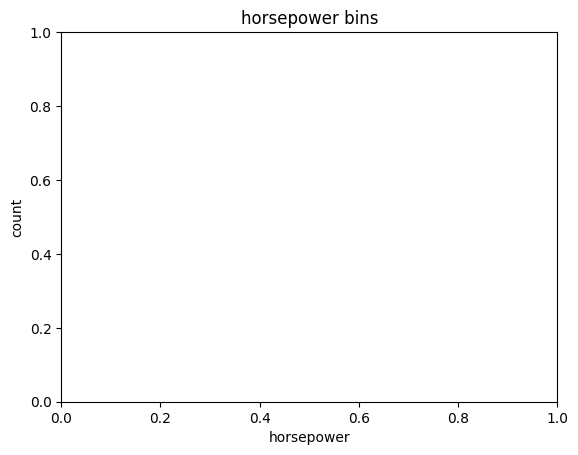

In [15]:
# Data Binning
# Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
df['horsepower'] = df['horsepower'].astype('int', copy= True)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

In [16]:
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels= group_names, include_lowest=True)
print(df[['horsepower','horsepower-binned']].head(20))
print(df["horsepower-binned"].value_counts())

    horsepower horsepower-binned
0          111               Low
1          111               Low
2          154            Medium
3          102               Low
4          115               Low
5          110               Low
6          110               Low
7          110               Low
8          140            Medium
9          101               Low
10         101               Low
11         121            Medium
12         121            Medium
13         121            Medium
14         182            Medium
15         182            Medium
16         182            Medium
17          48               Low
18          70               Low
19          70               Low
Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64


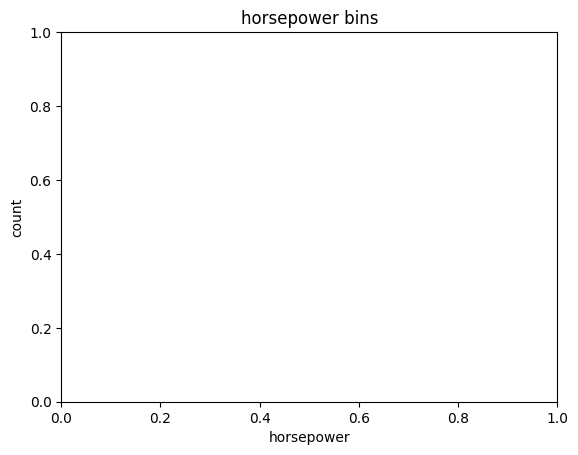

In [17]:
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

In [18]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
print(dummy_variable_1.head())
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
print(dummy_variable_1.head())


   diesel  gas
0       0    1
1       0    1
2       0    1
3       0    1
4       0    1
   fuel-type-diesel  fuel-type-gas
0                 0              1
1                 0              1
2                 0              1
3                 0              1
4                 0              1


In [19]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop('fuel-type', axis = 1, inplace=True)
print(df.tail(10))

     symboling  normalized-losses   make aspiration num-of-doors body-style  \
191         -1                 74  volvo        std         four      wagon   
192         -2                103  volvo        std         four      sedan   
193         -1                 74  volvo        std         four      wagon   
194         -2                103  volvo      turbo         four      sedan   
195         -1                 74  volvo      turbo         four      wagon   
196         -1                 95  volvo        std         four      sedan   
197         -1                 95  volvo      turbo         four      sedan   
198         -1                 95  volvo        std         four      sedan   
199         -1                 95  volvo      turbo         four      sedan   
200         -1                 95  volvo      turbo         four      sedan   

    drive-wheels engine-location  wheel-base    length  ...  \
191          rwd           front       104.3  0.907256  ...   
192 

In [20]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

In [21]:
# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

df.to_excel('cleandf.xlsx')

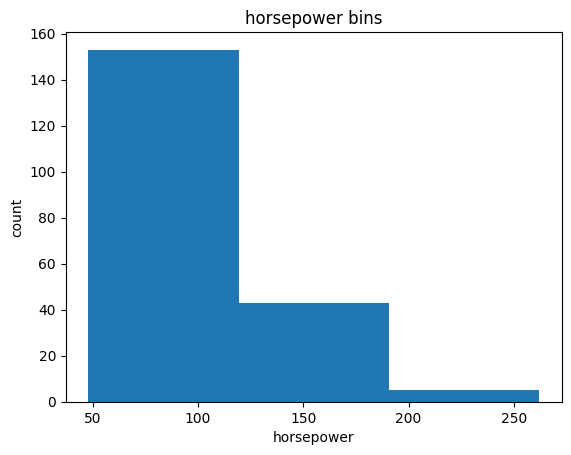

In [24]:
# draw historgram of attribute "horsepower" with bins = 3
plt.hist(df["horsepower"], bins = 3)

# # set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

In [25]:
import seaborn as sns
from scipy import stats